Corrélations fortes (|r| ≥ 0.8) :
🔴 Nationality Group ↔ International : 0.8335
🔴 Curricular units 1st sem (credited) ↔ Curricular units 1st sem (enrolled) : 0.8594
🔴 Curricular units 1st sem (credited) ↔ Curricular units 2nd sem (credited) : 0.9415
🔴 Curricular units 1st sem (enrolled) ↔ Curricular units 2nd sem (credited) : 0.8383
🔴 Curricular units 1st sem (enrolled) ↔ Curricular units 2nd sem (enrolled) : 0.9142
🔴 Curricular units 1st sem (approved) ↔ Curricular units 2nd sem (approved) : 0.8889
🔴 Curricular units 1st sem (grade) ↔ Curricular units 1st sem (Approved/Enrolled) : 0.8400
🔴 Curricular units 1st sem (grade) ↔ Curricular units 2nd sem (grade) : 0.8014
🔴 Curricular units 1st sem (Approved/Enrolled) ↔ Curricular units 2nd sem (grade) : 0.8047
🔴 Curricular units 1st sem (Approved/Enrolled) ↔ Curricular units 2nd sem (Approved/Enrolled) : 0.8528
🔴 Curricular units 2nd sem (approved) ↔ Curricular units 2nd sem (Approved/Enrolled) : 0.8648
🔴 Curricular units 2nd sem (grade) ↔ C

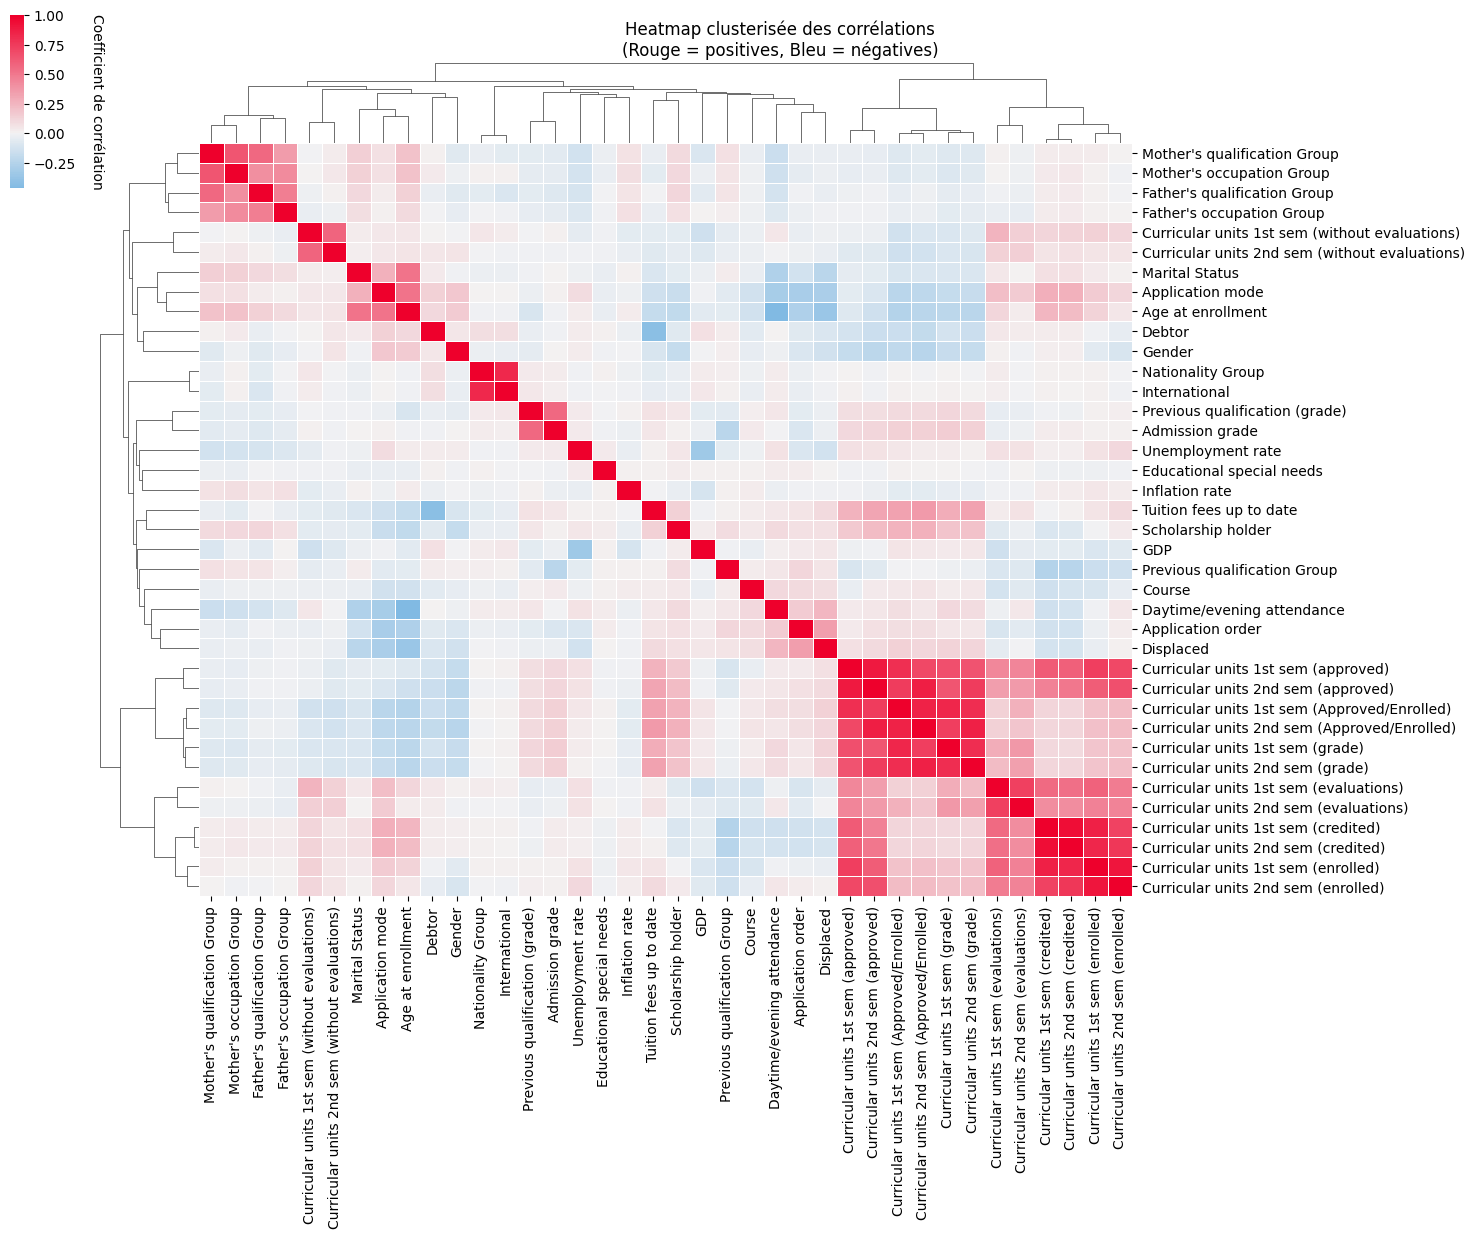

In [7]:
# 📊 MATRICE DE CORRÉLATION COMPLÈTE AVEC HEATMAP CLUSTERISÉE
# ════════════════════════════════════════════════════════════════════════════
# Description: Génération d'une matrice de corrélation complète avec une heatmap clusterisée
# ════════════════════════════════════════════════════════════════════════════

# _________________ 1️⃣  IMPORTATION DES LIBRAIRIES _______________________
# Import des librairies nécessaires

import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import warnings
warnings.filterwarnings('ignore')

# _________________ 2️⃣  CHARGEMENT DES DONNÉES _______________________
# Recharger le fichier CSV pour s'assurer de partir d'une version propre
df = pd.read_csv(Path.cwd().parent / 'data' / 'data_update.csv', delimiter=';')


# _________________ 3️⃣  GÉNÉRATION DE LA MATRICE DE CORRÉLATION _______________________
# Dossier pour enregistrer les graphiques
graphiques_folder = Path.cwd().parent / 'graphiques'

# Sélection des colonnes numériques uniquement 
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[num_cols]

# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

# Extraction des corrélations fortes (|r| ≥ 0.8)
strong_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        val = corr_matrix.iloc[i, j]
        if abs(val) >= 0.8:
            strong_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], val))

# _________________ 4️⃣   AFFICHAGE DES PAIRES FORTEMENT CORRÉLÉES _______________________
# Affichage des paires fortement corrélées dans la console
print("Corrélations fortes (|r| ≥ 0.8) :")
for var1, var2, val in strong_pairs:
    sign = "🔴" if val > 0 else "🔵"  # Rouge si positive, bleu sinon
    print(f"{sign} {var1} ↔ {var2} : {val:.4f}")


# _________________ 5️⃣  GÉNÉRATION DE LA HEATMAP CLUSTERISÉE _______________________
# Création de la palette rouge-blanc-bleu pour heatmap
cmap = sns.diverging_palette(250, 10, s=100, l=50, as_cmap=True)

# Calcul du clustering hiérarchique pour ordonner les variables
link_rows = linkage(corr_matrix, method='average')
link_cols = linkage(corr_matrix.T, method='average')

# Génération et affichage de la heatmap clusterisée complète
g = sns.clustermap(
    corr_matrix,
    row_linkage=link_rows,
    col_linkage=link_cols,
    cmap=cmap,
    center=0,
    linewidths=0.5,
    figsize=(14, 12),
    cbar_kws={'label': 'Coefficient de corrélation'},
    dendrogram_ratio=(0.1, 0.1),
)

# Récupérer la position actuelle de la colorbar (BBox)
pos = g.cax.get_position()

# Déplacer la colorbar horizontalement (x0, x1) ou verticalement (y0, y1)
new_pos = [pos.x0 - 0.07, pos.y0 + 0.08, pos.width, pos.height]

# Appliquer la nouvelle position
g.cax.set_position(new_pos)

# Modifier la taille de la police du label de la colorbar
g.cax.set_ylabel('Coefficient de corrélation', fontsize=10, rotation=270, labelpad=20)

# Modifier la taille et le ratio de la colorbar (l'axe lui-même)
pos = g.cax.get_position()
g.cax.set_position([pos.x0, pos.y0, pos.width * 0.2, pos.height * 0.8])  # Multiplier taille

plt.suptitle('Heatmap clusterisée des corrélations\n(Rouge = positives, Bleu = négatives)', y=1.02)

# _________________ 6️⃣  ENREGISTREMENT DE LA FIGURE _______________________
# Enregistrement de la figure
filename = os.path.join(graphiques_folder, "matrice_correlation.png")
g.savefig(filename)

# _________________ 7️⃣  AFFICHAGE DE LA FIGURE _______________________
# Affichage de la figure
plt.show()


📊 RANDOM FOREST - FEATURE IMPORTANCE ANALYSIS

🌳 ENTRAÎNEMENT RANDOM FOREST
✅ Entraînement terminé

📈 ÉVALUATION

✅ Accuracy:
  Train: 97.05%
  Test: 92.15%

📋 Classification Report (Test set):
              precision    recall  f1-score   support

     Dropout       0.94      0.85      0.89       268
    Graduate       0.91      0.96      0.94       420

    accuracy                           0.92       688
   macro avg       0.93      0.91      0.92       688
weighted avg       0.92      0.92      0.92       688


⭐ FEATURE IMPORTANCE

Top 20 features les plus importantes:
Curricular units 2nd sem (Approved/Enrolled)    0.228934
Curricular units 2nd sem (approved)             0.147085
Curricular units 1st sem (Approved/Enrolled)    0.114288
Curricular units 2nd sem (grade)                0.102344
Curricular units 1st sem (approved)             0.092535
Tuition fees up to date                         0.049284
Curricular units 1st sem (grade)                0.043569
Curricular units 2n

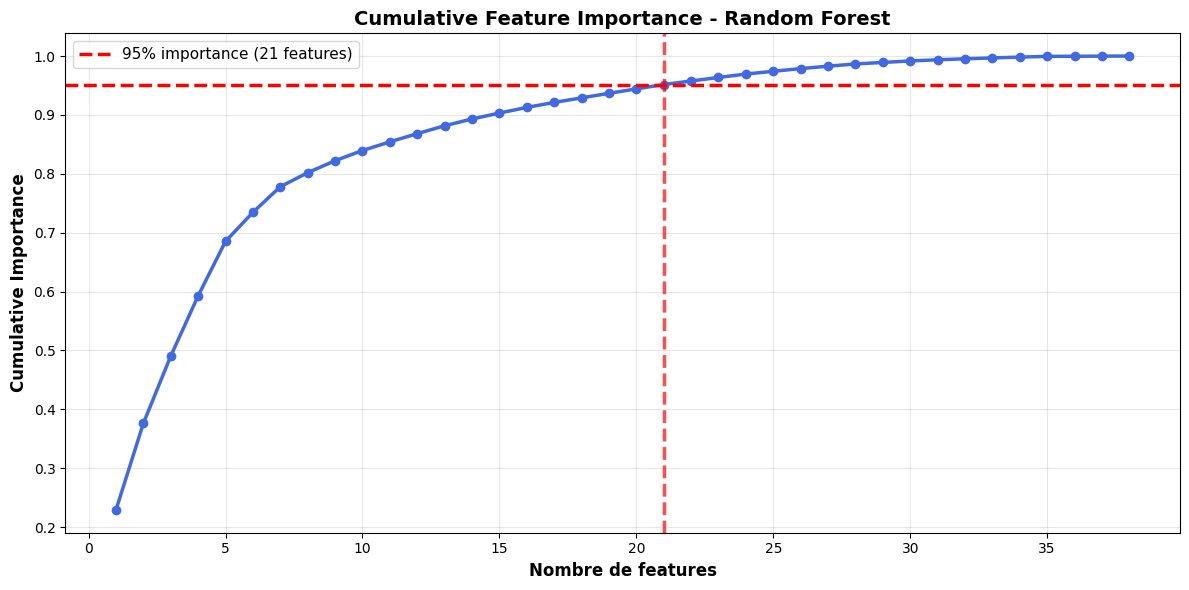

✅ Figure 2 sauvegardée : random_forest_top_features_95.png


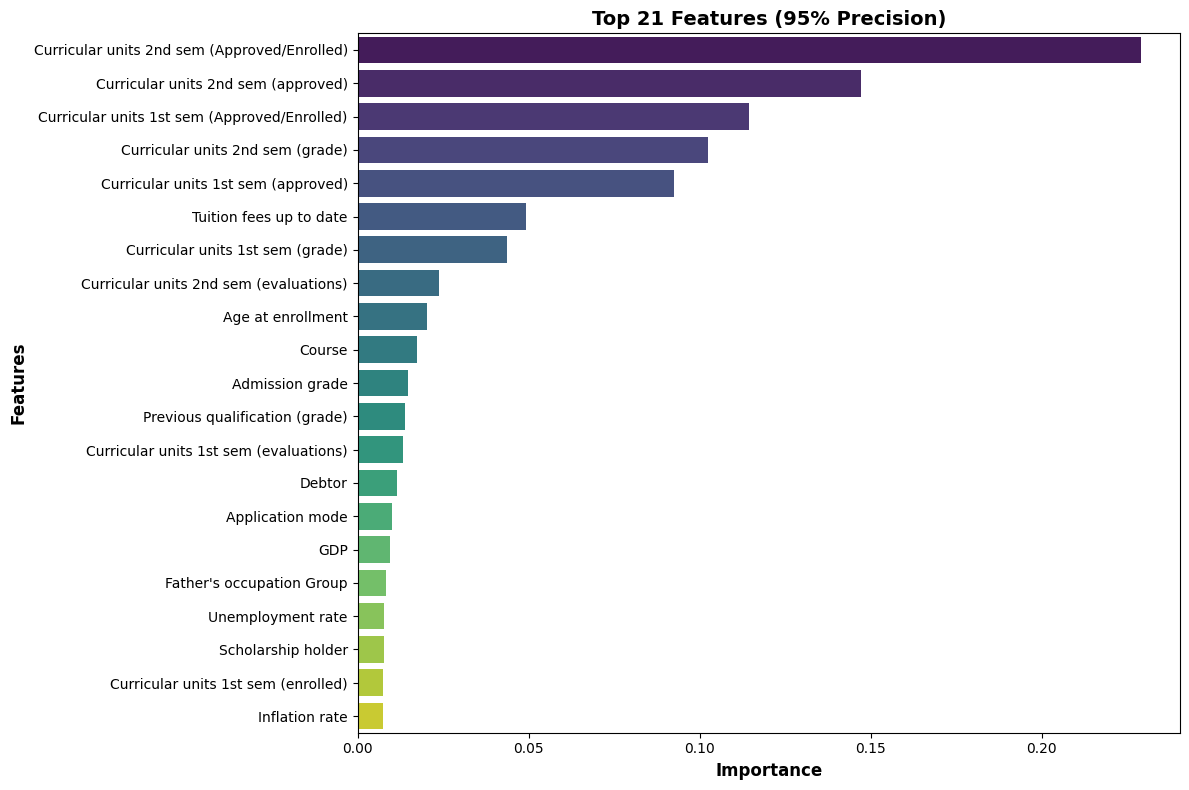


📊 Génération du graphique complet...
✅ Figure 3 sauvegardée : random_forest_all_features.png


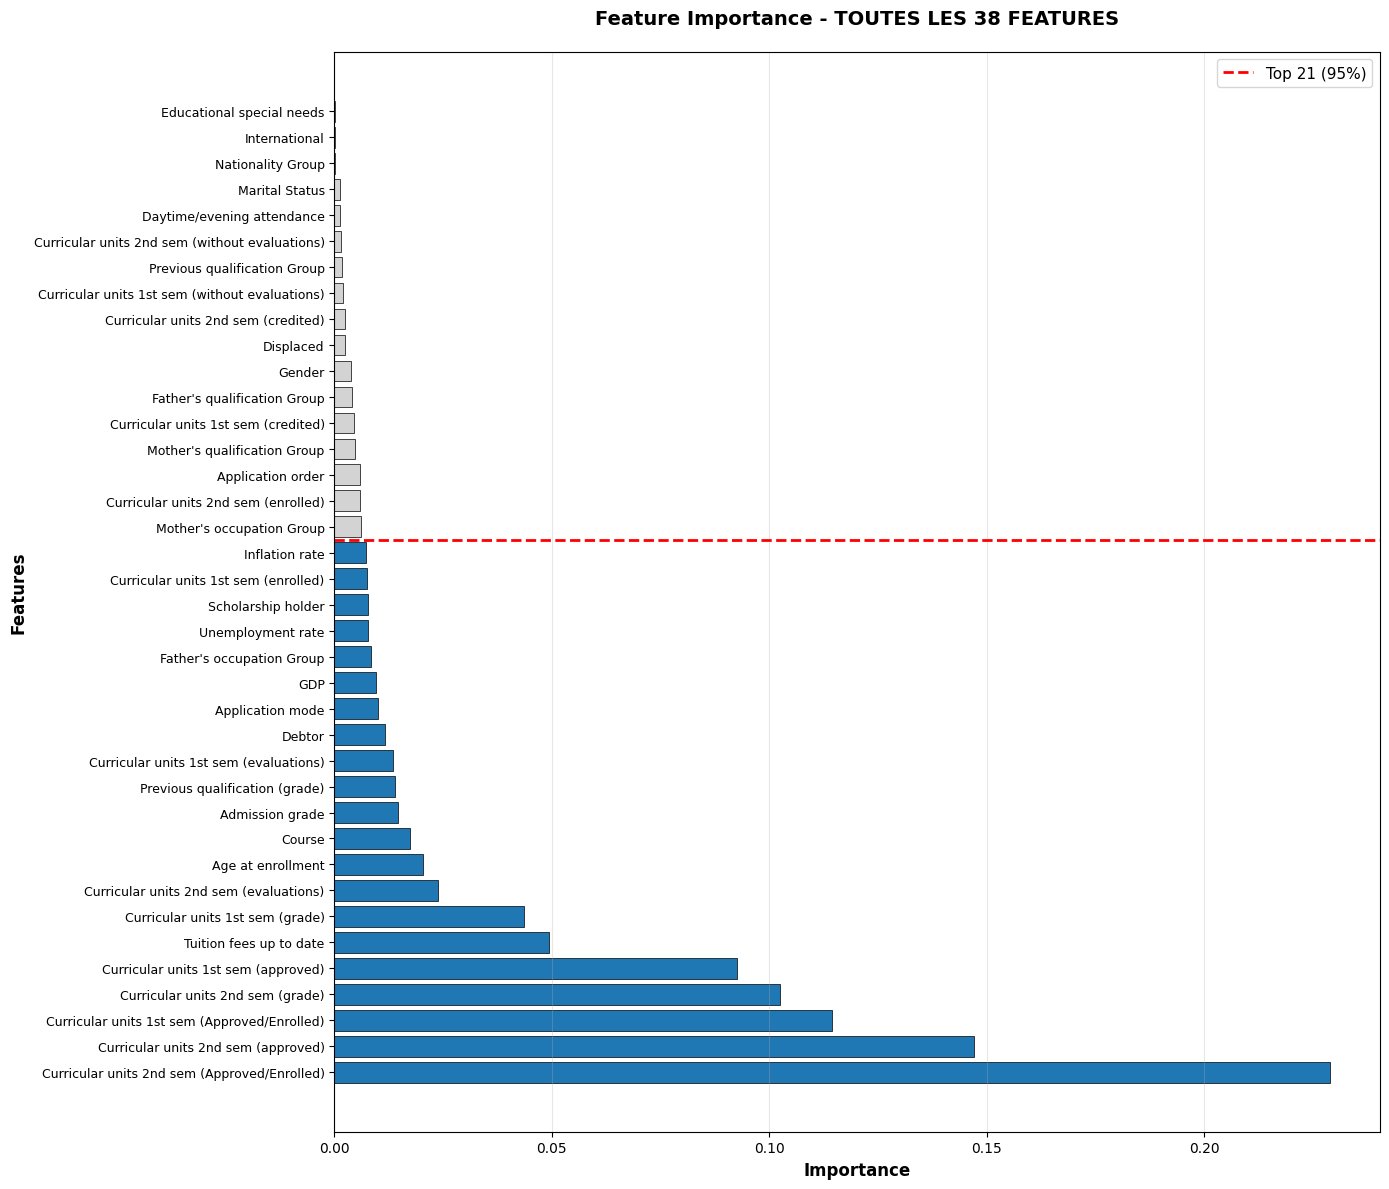


🎯 TOP 21 FEATURES (95% PRECISION)

✅ Ces 21 features représentent 95% de l'importance:

   1. Curricular units 2nd sem (Approved/Enrolled)  : 0.2289
   2. Curricular units 2nd sem (approved)           : 0.1471
   3. Curricular units 1st sem (Approved/Enrolled)  : 0.1143
   4. Curricular units 2nd sem (grade)              : 0.1023
   5. Curricular units 1st sem (approved)           : 0.0925
   6. Tuition fees up to date                       : 0.0493
   7. Curricular units 1st sem (grade)              : 0.0436
   8. Curricular units 2nd sem (evaluations)        : 0.0238
   9. Age at enrollment                             : 0.0204
  10. Course                                        : 0.0173
  11. Admission grade                               : 0.0147
  12. Previous qualification (grade)                : 0.0140
  13. Curricular units 1st sem (evaluations)        : 0.0134
  14. Debtor                                        : 0.0115
  15. Application mode                              : 0.0

'\nMODIFIER LE SEUIL :\n  n_features_95 = (cumulative_importance <= 0.95).sum() + 1\n  Remplacer 0.95 par 0.90 (90%) ou 0.99 (99%)\n\nCHANGER LES COULEURS :\n  Figure 1: color=\'royalblue\' → \'green\', \'purple\', etc.\n  Figure 2: palette="viridis" → "coolwarm", "plasma", "mako"\n  Figure 3: \'#1f77b4\' (bleu), \'#d3d3d3\' (gris) → codes hex personnalisés\n\nAJUSTER TAILLES GRAPHIQUES :\n  figsize=(largeur, hauteur) en pouces\n  Figure 3: fig_height = max(12, len(...) * 0.2) → modifier 0.2\n\nRÉSOLUTION IMAGES :\n  dpi=300 (impression) → dpi=150 (web) ou dpi=600 (haute qualité)\n\nTOP N FEATURES :\n  feature_importances.head(20) → remplacer 20 par le nombre voulu\n\nFORMAT DÉCIMALES :\n  .6f = 6 décimales → .4f ou .2f\n  .2% = 2 décimales % → .1% ou .3%\n'

In [ ]:
# 📊 RANDOM FOREST - FEATURE IMPORTANCE & SÉLECTION (95%)
# ════════════════════════════════════════════════════════════════════════════
# Description: Analyse complète des features avec Random Forest
# - Affichage console de TOUTES les features
# - 3 graphiques : cumulative, top 95%, toutes les features
# Date: 2025-11-21
# ════════════════════════════════════════════════════════════════════════════


# ═══════════════════════════════════════════════════════════════════════════════
# 1️⃣  IMPORTATION DES LIBRAIRIES
# ═══════════════════════════════════════════════════════════════════════════════

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Dossier pour enregistrer les graphiques
graphiques_folder = Path.cwd() / 'graphiques'
graphiques_folder.mkdir(exist_ok=True)

# ═══════════════════════════════════════════════════════════════════════════════
# 2️⃣  CHARGEMENT DES DONNÉES
# ═══════════════════════════════════════════════════════════════════════════════

print("="*80)
print("📊 RANDOM FOREST - FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Charger les fichiers train et test
df_train = pd.read_csv(Path.cwd().parent / 'data' / 'data_train.csv', delimiter=';')
df_test = pd.read_csv(Path.cwd().parent / 'data' / 'data_test.csv', delimiter=';')

# Préparation des données
X_train = df_train.drop(columns=['Target'])
y_train = df_train['Target']
X_test = df_test.drop(columns=['Target'])
y_test = df_test['Target']


# ═══════════════════════════════════════════════════════════════════════════════
# 3️⃣  ENTRAÎNEMENT RANDOM FOREST
# ═══════════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("🌳 ENTRAÎNEMENT RANDOM FOREST")
print("="*80)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("✅ Entraînement terminé")


# ═══════════════════════════════════════════════════════════════════════════════
# 4️⃣  ÉVALUATION DU MODÈLE
# ═══════════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📈 ÉVALUATION")
print("="*80)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print(f"\n✅ Accuracy:")
print(f"  Train: {train_score:.2%}")
print(f"  Test: {test_score:.2%}")

print(f"\n📋 Classification Report (Test set):")
print(classification_report(y_test, y_pred_test))


# ═══════════════════════════════════════════════════════════════════════════════
# 5️⃣  EXTRACTION DES IMPORTANCES
# ═══════════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("⭐ FEATURE IMPORTANCE")
print("="*80)

importances = rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# TOP 20
print(f"\nTop 20 features les plus importantes:")
print(feature_importances.head(20).to_string())


# ═══════════════════════════════════════════════════════════════════════════════
# 6️⃣  AFFICHAGE COMPLET DE TOUTES LES FEATURES (CONSOLE)
# ═══════════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print(f"📊 TOUTES LES {len(feature_importances)} FEATURES - IMPORTANCE COMPLÈTE")
print("="*80)

print("\n" + "-"*95)
print(f"{'Rang':<6} {'Feature':<50} {'Importance':<15} {'Cumulative %':<15}")
print("-"*95)

for i, (feat, importance) in enumerate(feature_importances.items(), 1):
    cumulative_pct = feature_importances.head(i).sum() * 100
    print(f"{i:<6} {feat:<50} {importance:<15.6f} {cumulative_pct:<15.2f}%")

print("-"*95)


# ═══════════════════════════════════════════════════════════════════════════════
# 7️⃣  CALCUL DU SEUIL 95%
# ═══════════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📊 CUMULATIVE IMPORTANCE (95%)")
print("="*80)

cumulative_importance = feature_importances.cumsum()
n_features_95 = (cumulative_importance <= 0.95).sum() + 1

print(f"\n✅ Features nécessaires pour 95% importance: {n_features_95}")
reduction_pct = (1 - n_features_95/len(feature_importances)) * 100
print(f"  (soit une réduction de {reduction_pct:.1f}%)")


# ═══════════════════════════════════════════════════════════════════════════════
# 8️⃣  GÉNÉRATION DES 3 GRAPHIQUES
# ═══════════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📊 GÉNÉRATION DES VISUALISATIONS")
print("="*80)


# ──────────────────────────────────────────────────────────────────────────────
# FIGURE 1 : Cumulative Importance
# ──────────────────────────────────────────────────────────────────────────────

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_importance)+1), cumulative_importance.values, 
         'o-', lw=2.5, markersize=6, color='royalblue')
plt.axhline(y=0.95, color='red', ls='--', lw=2.5, 
            label=f'95% importance ({n_features_95} features)')
plt.axvline(x=n_features_95, color='red', ls='--', lw=2.5, alpha=0.7)
plt.xlabel("Nombre de features", fontsize=12, fontweight='bold')
plt.ylabel("Cumulative Importance", fontsize=12, fontweight='bold')
plt.title('Cumulative Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(graphiques_folder / 'random_forest_cumulative_95.png', dpi=300, bbox_inches='tight')
print("\n✅ Figure 1 sauvegardée : random_forest_cumulative_95.png")
plt.show()


# ──────────────────────────────────────────────────────────────────────────────
# FIGURE 2 : TOUTES LES FEATURES
# ──────────────────────────────────────────────────────────────────────────────

print("\n📊 Génération du graphique complet...")

fig_height = max(12, len(feature_importances) * 0.2)
plt.figure(figsize=(14, fig_height))

# Couleurs : bleu pour top 95%, gris pour le reste
colors = ['#1f77b4' if i < n_features_95 else '#d3d3d3' 
          for i in range(len(feature_importances))]

plt.barh(y=range(len(feature_importances)), 
         width=feature_importances.values,
         color=colors, edgecolor='black', linewidth=0.5)

plt.yticks(range(len(feature_importances)), feature_importances.index, fontsize=9)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title(f'Feature Importance - TOUTES LES {len(feature_importances)} FEATURES', 
          fontsize=14, fontweight='bold', pad=20)

# Ligne de séparation à 95%
if n_features_95 < len(feature_importances):
    plt.axhline(y=n_features_95 - 0.5, color='red', linestyle='--', 
                linewidth=2, label=f'Top {n_features_95} (95%)')
    plt.legend(fontsize=11)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(graphiques_folder / 'random_forest_all_features.png', dpi=300, bbox_inches='tight')
print("✅ Figure 3 sauvegardée : random_forest_all_features.png")
plt.show()


# ═══════════════════════════════════════════════════════════════════════════════
# 9️⃣  RÉSUMÉ FINAL
# ═══════════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print(f"🎯 TOP {n_features_95} FEATURES (95% PRECISION)")
print("="*80)

print(f"\n✅ Ces {n_features_95} features représentent 95% de l'importance:\n")

for i, (feat, importance) in enumerate(top_95_features.items(), 1):
    print(f"  {i:2d}. {feat:45s} : {importance:.4f}")

print("\n" + "="*80)
print("✅ RANDOM FOREST TERMINÉ")
print("="*80)
print(f"\n📁 Fichiers générés:")
print(f"  • random_forest_cumulative_95.png")
print(f"  • random_forest_top_features_95.png")
print(f"  • random_forest_all_features.png")
print("="*80)


# ═══════════════════════════════════════════════════════════════════════════════
# 💡 NOTES D'ADAPTATION RAPIDE
# ═══════════════════════════════════════════════════════════════════════════════
"""
MODIFIER LE SEUIL :
  n_features_95 = (cumulative_importance <= 0.95).sum() + 1
  Remplacer 0.95 par 0.90 (90%) ou 0.99 (99%)

CHANGER LES COULEURS :
  Figure 1: color='royalblue' → 'green', 'purple', etc.
  Figure 2: palette="viridis" → "coolwarm", "plasma", "mako"
  Figure 3: '#1f77b4' (bleu), '#d3d3d3' (gris) → codes hex personnalisés

AJUSTER TAILLES GRAPHIQUES :
  figsize=(largeur, hauteur) en pouces
  Figure 3: fig_height = max(12, len(...) * 0.2) → modifier 0.2

RÉSOLUTION IMAGES :
  dpi=300 (impression) → dpi=150 (web) ou dpi=600 (haute qualité)

FORMAT DÉCIMALES :
  .6f = 6 décimales → .4f ou .2f
  .2% = 2 décimales % → .1% ou .3%
"""

In [3]:
# 📊 XGBOOST - FEATURE IMPORTANCE & SÉLECTION (95%)
# ════════════════════════════════════════════════════════════════════════════
# Description: Analyse complète des features avec XGBoost
# - Affichage console de TOUTES les features
# - 3 graphiques : cumulative, top 95%, toutes les features
# - Comparaison : modèle complet vs modèle avec features sélectionnées
# Date: 2025-12-05
# ════════════════════════════════════════════════════════════════════════════



# ═══════════════════════════════════════════════════════════════════════════════
# 1️⃣  IMPORTATION DES LIBRAIRIES
# ═══════════════════════════════════════════════════════════════════════════════


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



# ═══════════════════════════════════════════════════════════════════════════════
# 2️⃣  CHARGEMENT DES DONNÉES
# ═══════════════════════════════════════════════════════════════════════════════

print("="*80)
print("📊 XGBOOST - FEATURE IMPORTANCE ANALYSIS")
print("="*80)


# Dossier pour les graphiques s'il n'existe pas
graphiques_folder = Path.cwd().parent / 'graphiques'
graphiques_folder.mkdir(exist_ok=True)

# Charger les fichiers train et test
df_train = pd.read_csv(Path.cwd().parent / 'data' / 'data_train.csv', delimiter=';')
df_test = pd.read_csv(Path.cwd().parent / 'data' / 'data_test.csv', delimiter=';')


# Préparation des données
X_train = df_train.drop(columns=['Target'])
y_train = df_train['Target']
X_test = df_test.drop(columns=['Target'])
y_test = df_test['Target']


print(f"\n✅ Données chargées:")
print(f"  Train: {X_train.shape[0]} lignes, {X_train.shape[1]} features")
print(f"  Test:  {X_test.shape[0]} lignes, {X_test.shape[1]} features")



# ═══════════════════════════════════════════════════════════════════════════════
# 3️⃣  ENTRAÎNEMENT XGBOOST (MODÈLE COMPLET)
# ═══════════════════════════════════════════════════════════════════════════════


print("\n" + "="*80)
print("🌳 ENTRAÎNEMENT XGBOOST (MODÈLE COMPLET - TOUTES LES FEATURES)")
print("="*80)


xgb_clf = XGBClassifier(
    n_estimators=300,              # nombre d'arbres
    max_depth=6,                   # profondeur maximale
    learning_rate=0.05,            # taux d'apprentissage (shrinkage)
    subsample=0.8,                 # échantillonnage des lignes
    colsample_bytree=0.8,          # échantillonnage des colonnes
    objective='binary:logistic',   # classification binaire (ou 'multi:softprob' si multiclass)
    eval_metric='logloss',         # métrique d'évaluation
    random_state=42,
    n_jobs=-1,
    verbose=0
)


xgb_clf.fit(X_train, y_train)
print("✅ Entraînement terminé")



# ═══════════════════════════════════════════════════════════════════════════════
# 4️⃣  ÉVALUATION DU MODÈLE COMPLET
# ═══════════════════════════════════════════════════════════════════════════════


print("\n" + "="*80)
print("📈 ÉVALUATION - MODÈLE COMPLET")
print("="*80)


y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)


train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)


print(f"\n✅ Accuracy:")
print(f"  Train: {train_score:.2%}")
print(f"  Test: {test_score:.2%}")


print(f"\n📋 Classification Report (Test set):")
print(classification_report(y_test, y_pred_test))



# ═══════════════════════════════════════════════════════════════════════════════
# 5️⃣  EXTRACTION DES IMPORTANCES
# ═══════════════════════════════════════════════════════════════════════════════


print("\n" + "="*80)
print("⭐ FEATURE IMPORTANCE - XGBOOST")
print("="*80)


importances = xgb_clf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)


# TOP 20
print(f"\nTop 20 features les plus importantes:")
print(feature_importances.head(20).to_string())



# ═══════════════════════════════════════════════════════════════════════════════
# 6️⃣  AFFICHAGE COMPLET DE TOUTES LES FEATURES (CONSOLE)
# ═══════════════════════════════════════════════════════════════════════════════


print("\n" + "="*80)
print(f"📊 TOUTES LES {len(feature_importances)} FEATURES - IMPORTANCE COMPLÈTE")
print("="*80)


print("\n" + "-"*95)
print(f"{'Rang':<6} {'Feature':<50} {'Importance':<15} {'Cumulative %':<15}")
print("-"*95)


for i, (feat, importance) in enumerate(feature_importances.items(), 1):
    cumulative_pct = feature_importances.head(i).sum() * 100
    print(f"{i:<6} {feat:<50} {importance:<15.6f} {cumulative_pct:<15.2f}%")


print("-"*95)



# ═══════════════════════════════════════════════════════════════════════════════
# 7️⃣  CALCUL DU SEUIL 95%
# ═══════════════════════════════════════════════════════════════════════════════


print("\n" + "="*80)
print("📊 CUMULATIVE IMPORTANCE (95%)")
print("="*80)


cumulative_importance = feature_importances.cumsum()
n_features_95 = (cumulative_importance <= 0.95).sum() + 1


print(f"\n✅ Features nécessaires pour 95% importance: {n_features_95}")
reduction_pct = (1 - n_features_95/len(feature_importances)) * 100
print(f"  (soit une réduction de {reduction_pct:.1f}%)")


# Features sélectionnées
selected_feature_names = feature_importances.head(n_features_95).index.tolist()
print(f"\n📋 Features sélectionnées:")
for i, feat in enumerate(selected_feature_names, 1):
    print(f"  {i:2d}. {feat}")



# ═══════════════════════════════════════════════════════════════════════════════
# 8️⃣  GÉNÉRATION DES 3 GRAPHIQUES
# ═══════════════════════════════════════════════════════════════════════════════


print("\n" + "="*80)
print("📊 GÉNÉRATION DES VISUALISATIONS")
print("="*80)



# ──────────────────────────────────────────────────────────────────────────────
# FIGURE 1 : Cumulative Importance
# ──────────────────────────────────────────────────────────────────────────────


plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_importance)+1), cumulative_importance.values, 
         'o-', lw=2.5, markersize=6, color='royalblue')
plt.axhline(y=0.95, color='red', ls='--', lw=2.5, 
            label=f'95% importance ({n_features_95} features)')
plt.axvline(x=n_features_95, color='red', ls='--', lw=2.5, alpha=0.7)
plt.xlabel("Nombre de features", fontsize=12, fontweight='bold')
plt.ylabel("Cumulative Importance", fontsize=12, fontweight='bold')
plt.title('Cumulative Feature Importance - XGBoost', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(graphiques_folder / 'xgboost_cumulative_95.png', dpi=300, bbox_inches='tight')
print("\n✅ Figure 1 sauvegardée : xgboost_cumulative_95.png")
plt.close()


# ──────────────────────────────────────────────────────────────────────────────
# FIGURE 2 : TOUTES LES FEATURES
# ──────────────────────────────────────────────────────────────────────────────


print("\n📊 Génération du graphique complet...")


fig_height = max(12, len(feature_importances) * 0.2)
plt.figure(figsize=(14, fig_height))


# Couleurs : bleu pour top 95%, gris pour le reste
colors = ['#1f77b4' if i < n_features_95 else '#d3d3d3' 
          for i in range(len(feature_importances))]


plt.barh(y=range(len(feature_importances)), 
         width=feature_importances.values,
         color=colors, edgecolor='black', linewidth=0.5)


plt.yticks(range(len(feature_importances)), feature_importances.index, fontsize=9)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title(f'Feature Importance - TOUTES LES {len(feature_importances)} FEATURES - XGBoost', 
          fontsize=14, fontweight='bold', pad=20)


# Ligne de séparation à 95%
if n_features_95 < len(feature_importances):
    plt.axhline(y=n_features_95 - 0.5, color='red', linestyle='--', 
                linewidth=2, label=f'Top {n_features_95} (95%)')
    plt.legend(fontsize=11)


plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(graphiques_folder / 'xgboost_all_features.png', dpi=300, bbox_inches='tight')
print("✅ Figure 3 sauvegardée : xgboost_all_features.png")
plt.close()



# ═══════════════════════════════════════════════════════════════════════════════
# 9️⃣  ENTRAÎNEMENT XGBOOST AVEC FEATURES SÉLECTIONNÉES (95%)
# ═══════════════════════════════════════════════════════════════════════════════


print("\n" + "="*80)
print(f"🌳 ENTRAÎNEMENT XGBOOST (MODÈLE RÉDUIT - {n_features_95} FEATURES)")
print("="*80)


# Préparer les données réduites
X_train_sel = X_train[selected_feature_names]
X_test_sel = X_test[selected_feature_names]


# Entraîner un nouveau modèle
xgb_clf_sel = XGBClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.01,
    subsample=0.5,
    colsample_bytree=0.6,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    verbose=0
)


xgb_clf_sel.fit(X_train_sel, y_train)
print("✅ Entraînement terminé")



# ═══════════════════════════════════════════════════════════════════════════════
# 🔟 ÉVALUATION ET COMPARAISON
# ═══════════════════════════════════════════════════════════════════════════════


print("\n" + "="*80)
print("📈 COMPARAISON: MODÈLE COMPLET vs MODÈLE RÉDUIT")
print("="*80)


# Prédictions avec le modèle réduit
y_pred_train_sel = xgb_clf_sel.predict(X_train_sel)
y_pred_test_sel = xgb_clf_sel.predict(X_test_sel)


train_score_sel = accuracy_score(y_train, y_pred_train_sel)
test_score_sel = accuracy_score(y_test, y_pred_test_sel)


print(f"\n📊 MODÈLE COMPLET ({len(feature_importances)} features):")
print(f"  Train Accuracy: {train_score:.2%}")
print(f"  Test Accuracy:  {test_score:.2%}")


print(f"\n📊 MODÈLE RÉDUIT ({n_features_95} features - 95%):")
print(f"  Train Accuracy: {train_score_sel:.2%}")
print(f"  Test Accuracy:  {test_score_sel:.2%}")


diff_train = (train_score_sel - train_score) * 100
diff_test = (test_score_sel - test_score) * 100


print(f"\n📊 DIFFÉRENCE (Réduit - Complet):")
print(f"  Train: {diff_train:+.2f}pp")
print(f"  Test:  {diff_test:+.2f}pp")


print(f"\n📊 RÉDUCTION:")
print(f"  Features: {len(feature_importances)} → {n_features_95} (réduction de {reduction_pct:.1f}%)")


print(f"\n📋 Classification Report - Modèle Réduit (Test set):")
print(classification_report(y_test, y_pred_test_sel))



# ═══════════════════════════════════════════════════════════════════════════════
# 1️⃣1️⃣ RÉSUMÉ FINAL
# ═══════════════════════════════════════════════════════════════════════════════


print("\n" + "="*80)
print(f"🎯 TOP {n_features_95} FEATURES (95% PRECISION)")
print("="*80)


print(f"\n✅ Ces {n_features_95} features représentent 95% de l'importance:\n")


for i, (feat, importance) in enumerate(feature_importances.head(n_features_95).items(), 1):
    print(f"  {i:2d}. {feat:45s} : {importance:.4f}")


print("\n" + "="*80)
print("✅ XGBOOST ANALYSIS TERMINÉE")
print("="*80)
print(f"\n📁 Fichiers générés:")
print(f"  • xgboost_cumulative_95.png")
print(f"  • xgboost_top_features_95.png")
print(f"  • xgboost_all_features.png")
print("="*80)



# ═══════════════════════════════════════════════════════════════════════════════
# 💡 NOTES D'ADAPTATION RAPIDE
# ═══════════════════════════════════════════════════════════════════════════════
"""
MODIFIER LE SEUIL :
  n_features_95 = (cumulative_importance <= 0.95).sum() + 1
  Remplacer 0.95 par 0.90 (90%) ou 0.99 (99%)


AJUSTER HYPERPARAMÈTRES XGBOOST :
  n_estimators : 100 → 500 (plus d'arbres = meilleure fit, plus lent)
  max_depth : 6 → 4 (moins profond) ou 8 (plus profond)
  learning_rate : 0.05 → 0.1 (plus rapide) ou 0.01 (plus lent, généralement meilleur)
  subsample : 0.8 → 0.5 (moins de données par arbre)
  colsample_bytree : 0.8 → 0.6 (moins de features par arbre)


CHANGER LES COULEURS :
  Figure 1: color='royalblue' → 'green', 'purple', etc.
  Figure 2: palette="viridis" → "coolwarm", "plasma", "mako"
  Figure 3: '#1f77b4' (bleu), '#d3d3d3' (gris) → codes hex personnalisés


AJUSTER TAILLES GRAPHIQUES :
  figsize=(largeur, hauteur) en pouces
  Figure 3: fig_height = max(12, len(...) * 0.2) → modifier 0.2


RÉSOLUTION IMAGES :
  dpi=300 (impression) → dpi=150 (web) ou dpi=600 (haute qualité)


TYPES DE CLASSIFICATION :
  binary:logistic → classification binaire
  multi:softprob → multiclass (plus de 2 classes)
  multi:softmax → multiclass (autre variante)


SAUVEGARDER LES FEATURES SÉLECTIONNÉES :
  selected_df = X_train[selected_feature_names]
  selected_df.to_csv('features_selectionnees.csv', index=False)
"""

📊 XGBOOST - FEATURE IMPORTANCE ANALYSIS

✅ Données chargées:
  Train: 2748 lignes, 38 features
  Test:  688 lignes, 38 features

🌳 ENTRAÎNEMENT XGBOOST (MODÈLE COMPLET - TOUTES LES FEATURES)


c:\Users\romua\Documents\La_Plateforme_\Projet 5 - Perceptron Multicouche\ANN-playground\.env\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:51:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Entraînement terminé

📈 ÉVALUATION - MODÈLE COMPLET

✅ Accuracy:
  Train: 99.82%
  Test: 92.44%

📋 Classification Report (Test set):
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       268
           1       0.91      0.97      0.94       420

    accuracy                           0.92       688
   macro avg       0.93      0.91      0.92       688
weighted avg       0.93      0.92      0.92       688


⭐ FEATURE IMPORTANCE - XGBOOST

Top 20 features les plus importantes:
Curricular units 2nd sem (Approved/Enrolled)      0.305519
Tuition fees up to date                           0.074332
Curricular units 1st sem (approved)               0.072216
Curricular units 2nd sem (approved)               0.057319
Curricular units 1st sem (Approved/Enrolled)      0.045433
Debtor                                            0.031471
Course                                            0.019119
Curricular units 1st sem (without evaluations)    0.01

c:\Users\romua\Documents\La_Plateforme_\Projet 5 - Perceptron Multicouche\ANN-playground\.env\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:51:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Entraînement terminé

📈 COMPARAISON: MODÈLE COMPLET vs MODÈLE RÉDUIT

📊 MODÈLE COMPLET (38 features):
  Train Accuracy: 99.82%
  Test Accuracy:  92.44%

📊 MODÈLE RÉDUIT (32 features - 95%):
  Train Accuracy: 96.54%
  Test Accuracy:  93.02%

📊 DIFFÉRENCE (Réduit - Complet):
  Train: -3.28pp
  Test:  +0.58pp

📊 RÉDUCTION:
  Features: 38 → 32 (réduction de 15.8%)

📋 Classification Report - Modèle Réduit (Test set):
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       268
           1       0.92      0.97      0.94       420

    accuracy                           0.93       688
   macro avg       0.94      0.92      0.93       688
weighted avg       0.93      0.93      0.93       688


🎯 TOP 32 FEATURES (95% PRECISION)

✅ Ces 32 features représentent 95% de l'importance:

   1. Curricular units 2nd sem (Approved/Enrolled)  : 0.3055
   2. Tuition fees up to date                       : 0.0743
   3. Curricular units 1st sem (approved)   

'\nMODIFIER LE SEUIL :\n  n_features_95 = (cumulative_importance <= 0.95).sum() + 1\n  Remplacer 0.95 par 0.90 (90%) ou 0.99 (99%)\n\n\nAJUSTER HYPERPARAMÈTRES XGBOOST :\n  n_estimators : 100 → 500 (plus d\'arbres = meilleure fit, plus lent)\n  max_depth : 6 → 4 (moins profond) ou 8 (plus profond)\n  learning_rate : 0.05 → 0.1 (plus rapide) ou 0.01 (plus lent, généralement meilleur)\n  subsample : 0.8 → 0.5 (moins de données par arbre)\n  colsample_bytree : 0.8 → 0.6 (moins de features par arbre)\n\n\nCHANGER LES COULEURS :\n  Figure 1: color=\'royalblue\' → \'green\', \'purple\', etc.\n  Figure 2: palette="viridis" → "coolwarm", "plasma", "mako"\n  Figure 3: \'#1f77b4\' (bleu), \'#d3d3d3\' (gris) → codes hex personnalisés\n\n\nAJUSTER TAILLES GRAPHIQUES :\n  figsize=(largeur, hauteur) en pouces\n  Figure 3: fig_height = max(12, len(...) * 0.2) → modifier 0.2\n\n\nRÉSOLUTION IMAGES :\n  dpi=300 (impression) → dpi=150 (web) ou dpi=600 (haute qualité)\n\n\nTYPES DE CLASSIFICATION :\n  bi

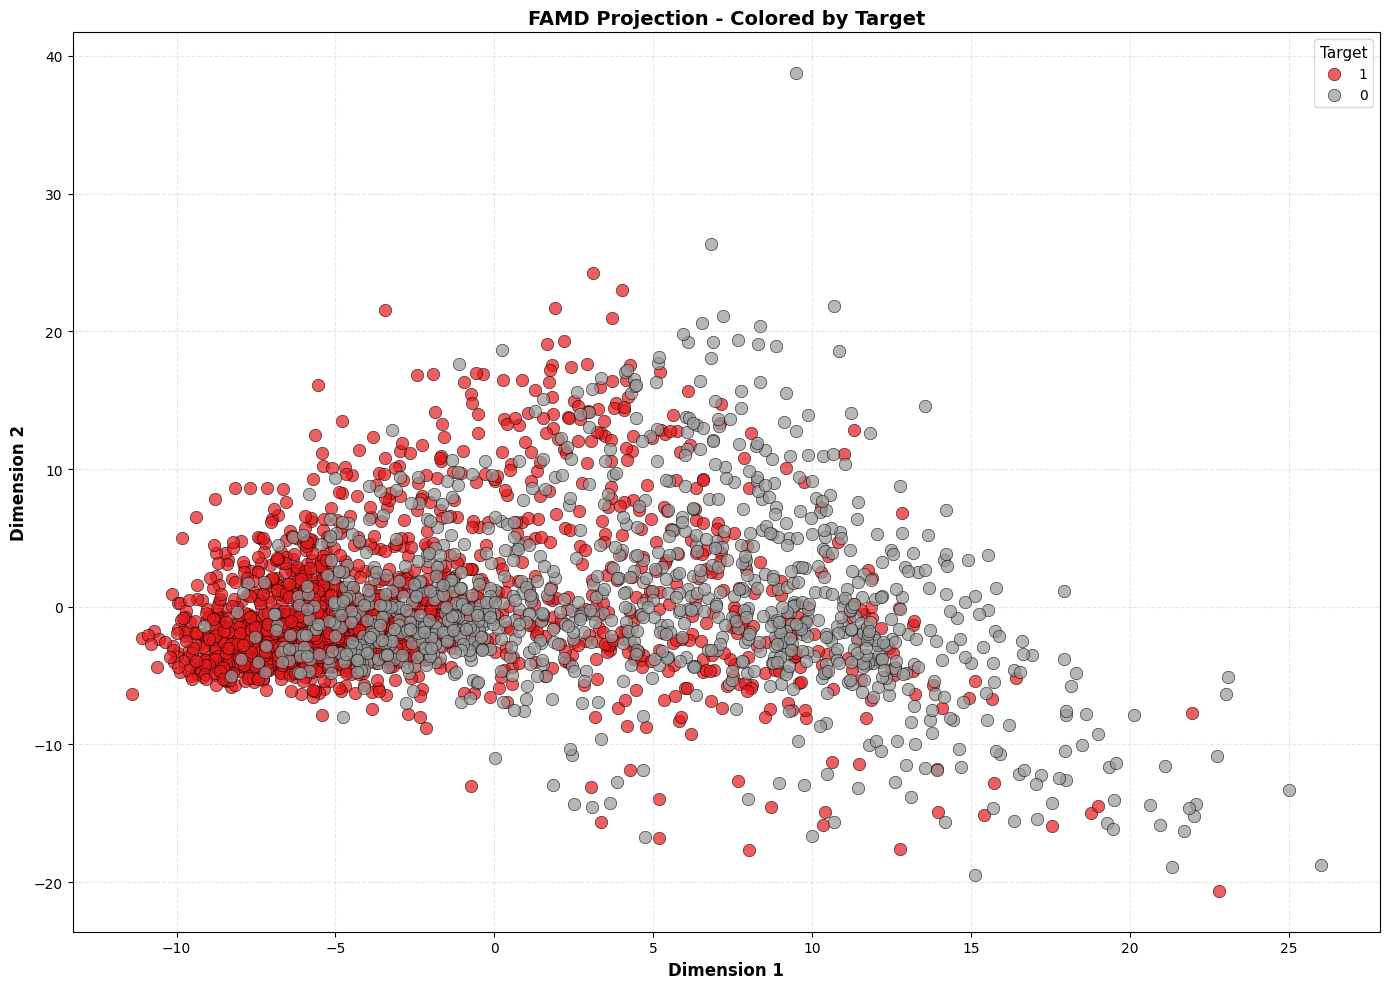


FEATURE CONTRIBUTIONS BY COMPONENT (%)
(Normalized - each column sums to 100%)
component                                           0      1      2      3  \
variable                                                                     
Admission grade                                  9.52  15.21  13.83  24.79   
Previous qualification (grade)                   9.50   7.76   4.34  26.39   
Application mode                                11.62  10.69   3.29  20.30   
Course                                           7.84   7.03   3.49   1.53   
Previous qualification Group                     4.53   9.73   1.90   2.99   
Mother's occupation Group                        2.77  10.68  17.51   1.70   
Mother's qualification Group                     2.45  11.67  17.14   1.94   
Father's qualification Group                     2.36  10.85  16.22   1.14   
Father's occupation Group                        1.97   7.85  13.23   1.40   
Nationality Group                                0.01   0.12  

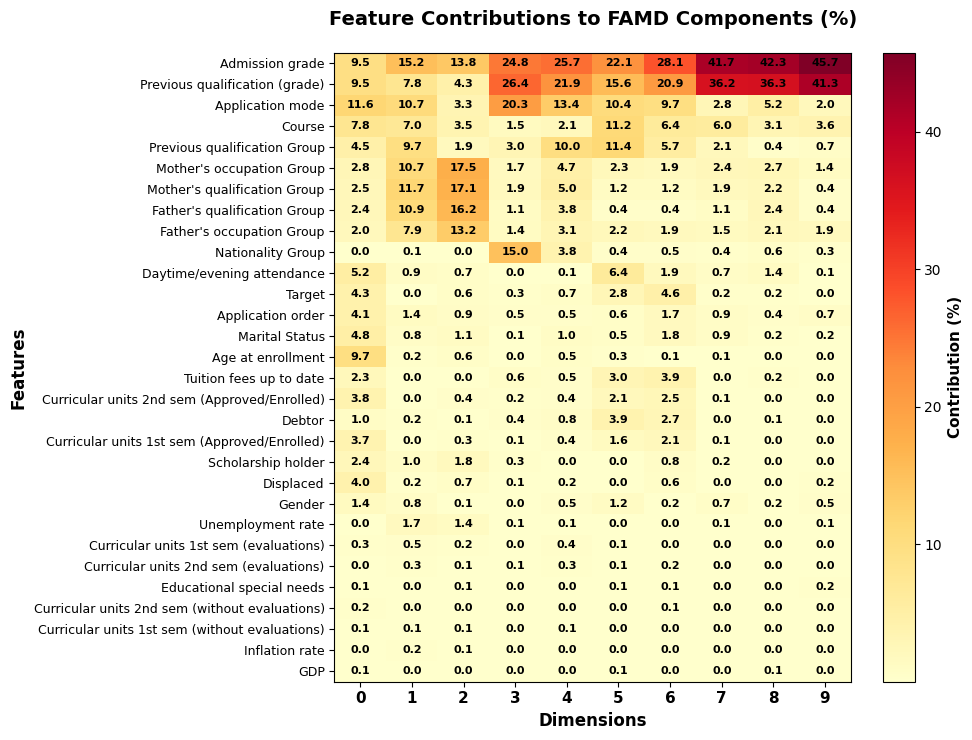

✓ Heatmap saved to: c:\Users\romua\Documents\La_Plateforme_\Projet 5 - Perceptron Multicouche\ANN-playground\graphiques\famd_contributions_heatmap.png

TOP 5 MOST IMPORTANT SAMPLES BY CONTRIBUTION



COLUMN COORDINATES (LOADINGS)
✓ Column coordinates saved to: c:\Users\romua\Documents\La_Plateforme_\Projet 5 - Perceptron Multicouche\ANN-playground\graphiques\famd_column_coordinates.csv

FAMD ANALYSIS SUMMARY
Total samples: 2748
Total features: 30
FAMD components: 10

Target distribution:
Target
1    1677
0    1071
Name: count, dtype: int64

Most influential feature: Admission grade
Least influential feature: GDP

Eigenvalues Summary:
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             49.300         0.69%                      0.69%
1             33.699         0.47%                      1.16%
2             29.720         0.41%                      1.57%
3             24.959         0.35%              

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prince import FAMD
from pathlib import Path


# ============================================================================
# CHEMINS
# ============================================================================
graphiques_folder = Path.cwd().parent / 'graphiques'
data_folder = Path.cwd().parent / 'data'


# ============================================================================
# 1. CHARGER LES DONNÉES
# ============================================================================
df = pd.read_csv(data_folder / 'data_train.csv', delimiter=';')


# Convertir les colonnes en type str 
columns_to_str = [
    'Marital Status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification Group',
    'Previous qualification (grade)', 'Nationality Group',
    "Mother's qualification Group", "Father's qualification Group",
    "Mother's occupation Group", "Father's occupation Group",
    'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Target'
]


for col in columns_to_str:
    if col in df.columns:
        df[col] = df[col].astype(str)


# ============================================================================
# 2. APPLIQUER FAMD
# ============================================================================
famd = FAMD(n_components=10, n_iter=3, random_state=42, engine="sklearn")
famd.fit(df)  # ✅ CHANGEMENT 1 : fit() seulement
X_famd = famd.transform(df)  # ✅ CHANGEMENT 2 : transform() séparément


# ============================================================================
# 3. PROJECTION COLORÉE PAR TARGET
# ============================================================================
fig, ax = plt.subplots(figsize=(14, 10))


# Créer une palette de couleurs
targets = df['Target'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(targets)))
color_map = {target: colors[i] for i, target in enumerate(targets)}


# Scatter plot avec couleurs
for target in targets:
    mask = (df['Target'] == target).values
    ax.scatter(
        X_famd.loc[mask, 0],  # Dimension 1
        X_famd.loc[mask, 1],  # Dimension 2
        label=target,
        alpha=0.7,
        s=80,
        color=color_map[target],
        edgecolors='black',
        linewidth=0.5
    )


ax.set_xlabel('Dimension 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Dimension 2', fontsize=12, fontweight='bold')
ax.set_title('FAMD Projection - Colored by Target', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, linestyle='--')
ax.legend(title='Target', fontsize=10, title_fontsize=11, loc='best')


plt.tight_layout()
plt.savefig(graphiques_folder / 'famd_projection_colored.png', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================================
# 4. TABLEAU DES CONTRIBUTIONS DE FEATURES
# ============================================================================

contribution_df = famd.column_contributions_.copy()

# ✅ NORMALISER LES CONTRIBUTIONS PAR COMPOSANTE
# Diviser par la somme de chaque colonne pour que ça somme à 100%
contribution_df = contribution_df.div(contribution_df.sum(axis=0), axis=1)

# Ajouter une colonne Total
contribution_df['Total'] = contribution_df.sum(axis=1)

# Trier par influence totale
contribution_df = contribution_df.sort_values('Total', ascending=False)

print("\n" + "="*80)
print("FEATURE CONTRIBUTIONS BY COMPONENT (%)")
print("="*80)
print("(Normalized - each column sums to 100%)")
print((contribution_df * 100).round(2))
print("\n")

# Vérifier que ça somme bien à 100%
print("Sum per component (should be ~100%):")
print((contribution_df.iloc[:, :-1].sum(axis=0) * 100).round(1))
print("\n")

# Sauvegarder en CSV
contribution_df.to_csv(graphiques_folder / 'famd_feature_contributions.csv')
print(f"✓ Contributions saved to: {graphiques_folder / 'famd_feature_contributions.csv'}")



# ============================================================================
# 5. HEATMAP DES CONTRIBUTIONS
# ============================================================================
fig, ax = plt.subplots(figsize=(10, max(6, len(contribution_df) * 0.25)))

# Prendre que les dimensions (sans le Total)
contribution_heatmap = contribution_df.iloc[:, :-1]  # ✅ CHANGEMENT 4 : Exclure la colonne Total

im = ax.imshow(contribution_heatmap.values * 100, cmap='YlOrRd', aspect='auto')  # ✅ CHANGEMENT 5 : * 100 pour %

# Ajouter les labels
ax.set_xticks(np.arange(contribution_heatmap.shape[1]))
ax.set_yticks(np.arange(contribution_heatmap.shape[0]))
ax.set_xticklabels(contribution_heatmap.columns, fontsize=11, fontweight='bold')
ax.set_yticklabels(contribution_heatmap.index, fontsize=9)

# Ajouter les valeurs dans chaque cellule
for i in range(contribution_heatmap.shape[0]):
    for j in range(contribution_heatmap.shape[1]):
        value = contribution_heatmap.values[i, j] * 100  # ✅ CHANGEMENT 6 : * 100
        text = ax.text(j, i, f'{value:.1f}',
                      ha="center", va="center", color="black", 
                      fontsize=8, fontweight='bold')


ax.set_title('Feature Contributions to FAMD Components (%)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_xlabel('Dimensions', fontsize=12, fontweight='bold')


cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Contribution (%)', fontsize=11, fontweight='bold')


plt.tight_layout()
plt.savefig(graphiques_folder / 'famd_contributions_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


print(f"✓ Heatmap saved to: {graphiques_folder / 'famd_contributions_heatmap.png'}")


# ============================================================================
# 6. ROW CONTRIBUTIONS (optionnel mais utile)
# ============================================================================
print("\n" + "="*80)
print("TOP 5 MOST IMPORTANT SAMPLES BY CONTRIBUTION")
print("="*80)

print("\n")
print(
    famd.row_contributions_
    .sort_values(0, ascending=False)
    .head(5)
    .style.format('{:.3%}')
)


# ============================================================================
# 7. COLUMN COORDINATES (optionnel mais utile)
# ============================================================================
print("\n" + "="*80)
print("COLUMN COORDINATES (LOADINGS)")
print("="*80)

column_coords = famd.column_coordinates_
column_coords.to_csv(graphiques_folder / 'famd_column_coordinates.csv')
print(f"✓ Column coordinates saved to: {graphiques_folder / 'famd_column_coordinates.csv'}")


# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*80)
print("FAMD ANALYSIS SUMMARY")
print("="*80)
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")
print(f"FAMD components: {famd.n_components}")
print(f"\nTarget distribution:")
print(df['Target'].value_counts())
print(f"\nMost influential feature: {contribution_df.index[0]}")
print(f"Least influential feature: {contribution_df.index[-1]}")
print(f"\nEigenvalues Summary:")
print(famd.eigenvalues_summary)

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import prince
from pathlib import Path


# ============================================================================
# CHEMINS
# ============================================================================
graphiques_folder = Path.cwd().parent / 'graphiques'
data_folder = Path.cwd().parent / 'data'


# ============================================================================
# 1. CHARGER LES DONNÉES
# ============================================================================
df = pd.read_csv(data_folder / 'data_train.csv', delimiter=';')


# Convertir les colonnes en type str 
columns_to_str = [
    'Marital Status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification Group',
    'Previous qualification (grade)', 'Nationality Group',
    "Mother's qualification Group", "Father's qualification Group",
    "Mother's occupation Group", "Father's occupation Group",
    'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Target'
]


for col in columns_to_str:
    if col in df.columns:
        df[col] = df[col].astype('category')

print(df.head())
# ============================================================================
# 2. APPLIQUER FAMD
# ============================================================================
famd = famd = prince.FAMD(
    n_components=30,
    n_iter=5,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(df)
X_famd = famd.transform(df)  # ✅ CHANGEMENT 2 : transform() séparément

print ("\n" + "="*80)
print("FAMD EIGENVALUES SUMMARY")
print("="*80)
print(famd.eigenvalues_summary)


  Marital Status Application mode Application order Course  \
0              1               43                 1   9147   
1              1                7                 1   9003   
2              1                1                 5   9500   
3              1               17                 1   9773   
4              1                7                 1   9500   

  Daytime/evening attendance Previous qualification Group  \
0                          1                            2   
1                          1                            0   
2                          1                            2   
3                          1                            2   
4                          1                            0   

  Previous qualification (grade) Nationality Group  \
0                          153.0                 0   
1                          120.0                 0   
2                          129.0                 0   
3                          130.0            

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger tes données
X = df.drop('Target', axis=1)
y = df['Target']

# Standardiser
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (pas FAMD!)
pca = PCA(n_components=24)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance: {pca.explained_variance_ratio_}")
print(f"Cumulative: {np.cumsum(pca.explained_variance_ratio_)}")
# Tu verras probablement 60-80% avec 10 composantes!

Explained variance: [0.12827861 0.08731313 0.08329806 0.06424233 0.05390642 0.04667487
 0.04390427 0.03936807 0.03612656 0.03477608 0.03389923 0.03348844
 0.03185536 0.03028532 0.02637302 0.0252652  0.02419553 0.0229115
 0.0211612  0.0204093  0.01909723 0.01744818 0.01673278 0.01387918]
Cumulative: [0.12827861 0.21559174 0.2988898  0.36313213 0.41703856 0.46371342
 0.5076177  0.54698577 0.58311233 0.61788841 0.65178765 0.68527609
 0.71713145 0.74741677 0.77378979 0.799055   0.82325052 0.84616202
 0.86732322 0.88773252 0.90682976 0.92427794 0.94101072 0.9548899 ]
